<a href="https://colab.research.google.com/github/Angepira/AngePira.github.io/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerías
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

## Entendamos el dataset

In [ ]:
#Cargammos el set de datos
iris = datasets.load_iris()

In [ ]:
#iris

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris['data_module']

'sklearn.datasets.data'

In [ ]:
#lo podemos convertir a dataframe
#Esta parte no es necesaria, es solo para verlo mejor
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Mostrar el DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preparemos los datos para el modelo

In [ ]:
#Creamos los conjuntos de datos
X = iris.data       ## Características (variables independientes)
y = iris.target     ## Etiquetas (variable dependiente)

In [ ]:
#Separamos los conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33)

In [ ]:
# Escalar los datos utilizando StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creemos el modelo

In [ ]:
#Instanciamos el modelo
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [ ]:
type(knn)

sklearn.neighbors._classification.KNeighborsClassifier

In [ ]:
#Entrenamos el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

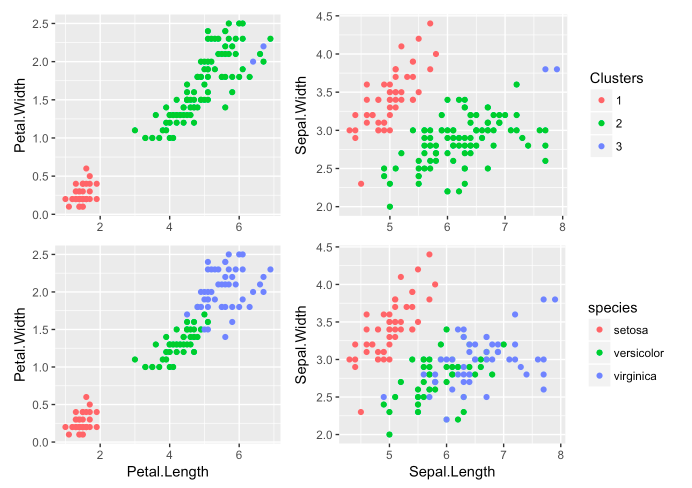

## Hacemos la predicción

In [ ]:
#Hacemos la predicción
y_pred = knn.predict(X_test)

## Evaluamos el modelo

In [ ]:
accuracy_score(y_test,y_pred)

0.631578947368421

In [ ]:
# Imprimir las etiquetas predichas y las verdaderas
print("Etiquetas predichas:", y_pred)
print("Etiquetas vrdaderas:", y_test)

Etiquetas predichas: [1 1 0 2 1 2 0 0 1 2 2 0 2 1 2 2 1 0 2 2 0 0 1 0 1 2 1 1 1 1 1 1 1 2 1 1 1
 1]
Etiquetas vrdaderas: [1 1 0 1 2 2 0 0 2 2 2 0 2 1 2 1 2 0 1 2 0 0 2 0 2 2 1 1 2 2 1 1 2 2 2 2 2
 1]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
#Separamos los conjuntos en entrenamiento y prueba
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y, random_state=33)

In [ ]:
#Instanciamos el modelo
knn2 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [ ]:
# Obtener las etiquetas predichas
y_pred_pca = knn.predict(X_test_pca)

In [ ]:
accuracy_score(y_test,y_pred_pca)

0.868421052631579

In [ ]:


# Graficar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters generados por KNN en el conjunto de datos de Iris')
plt.show()